# Time Series: Forecasting Bitcoin price

In [2]:
# Importing TF and checking the version
import tensorflow as tf

print(tf.__version__)

2.10.1


### Importing time series with Pandas

In [3]:
# Reading Bitcoin data and parsing dates
import pandas as pd

df = pd.read_csv(
    "BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
    parse_dates=["Date"],
    index_col=["Date"]   
)
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [6]:
len(df)

2787

In [7]:
# Separating closing prices for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


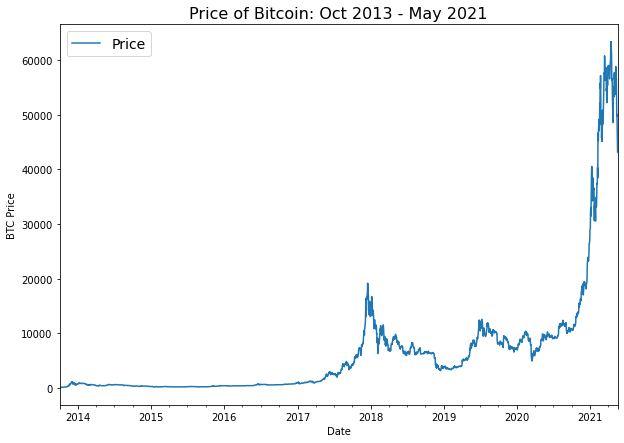

In [8]:
# Visualising Bitcoin prices
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin: Oct 2013 - May 2021", fontsize=16)
plt.legend(fontsize=14);

### Importing time series with Python

In [9]:
# Importing Bitcoin data with Python
import csv
from datetime import datetime

timestamps = []
btc_price = []
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    next(csv_reader) # Skips first line to remove column names
    for line in csv_reader:
        timestamps.append(datetime.strptime(line[1], "%Y-%m-%d"))
        btc_price.append(float(line[2]))

# Viewing first 10 records
timestamps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 1.0, 'Price of Bitcoin: Oct 2013 - May 2021')

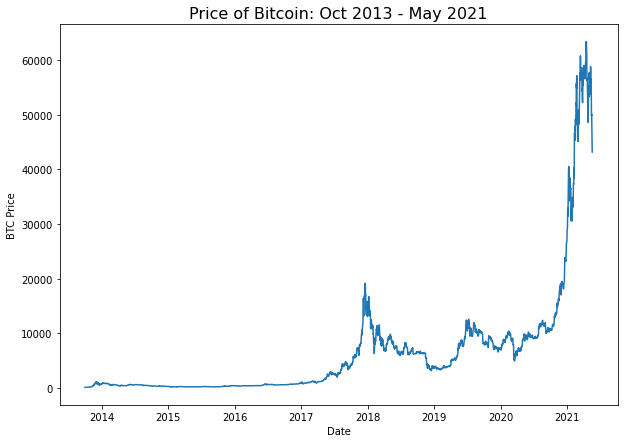

In [10]:
# Plotting from CSV
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 7))
plt.plot(timestamps, btc_price)
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin: Oct 2013 - May 2021", fontsize=16)
#plt.legend();

### Creating train and test data

In [11]:
# Get Bitcoin date array
timestamps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timestamps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [12]:
# Wrong way to create train / test split for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    timestamps, # dates
    prices, # BTC prices
    test_size=0.2,
    random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

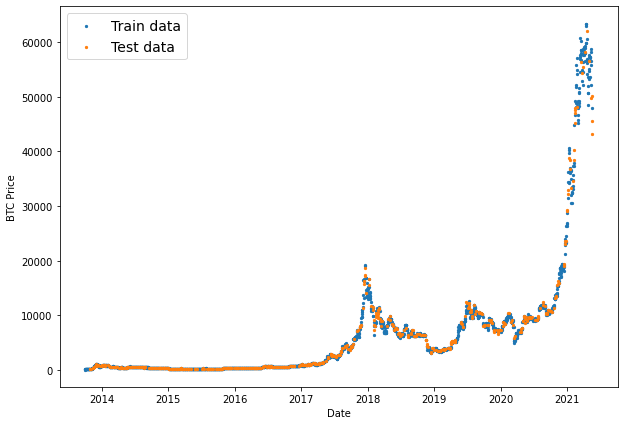

In [13]:
# Plotting the wrong data split results
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [14]:
# Right way to create train / test split for time series data
split_size = int(0.8 * len(prices)) # 80% - train, 20% - test

X_train, y_train = timestamps[:split_size], prices[:split_size]
X_test, y_test = timestamps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

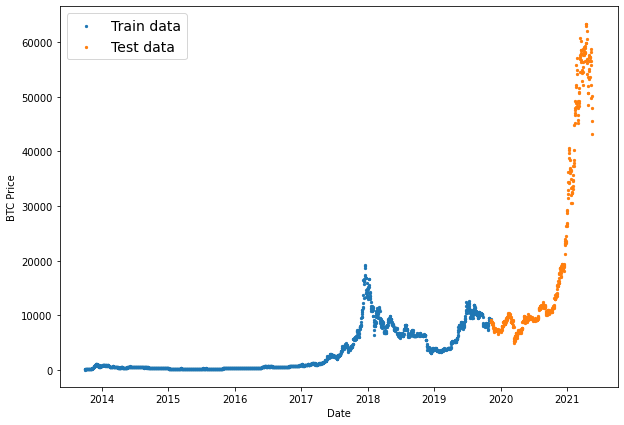

In [15]:
# Plotting the right data split results
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [16]:
# Creating plotting function
def plot_time_series(timestamps, values, marker=",", start=0, end=None, label=None):
    plt.plot(timestamps[start:end], values[start:end], marker=marker, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

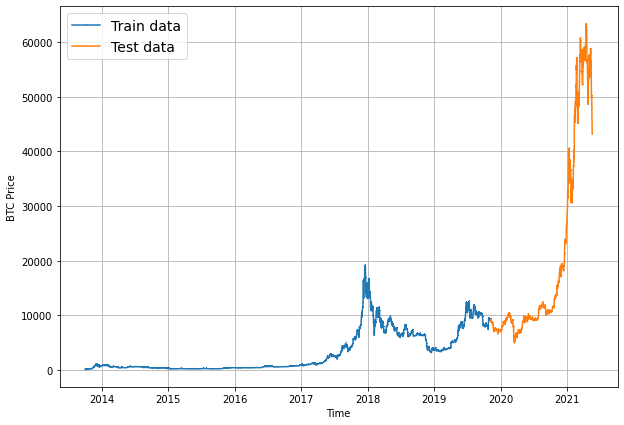

In [17]:
# Testing plot function
plt.figure(figsize=(10, 7))
plot_time_series(timestamps=X_train, values=y_train, label="Train data")
plot_time_series(timestamps=X_test, values=y_test, label="Test data")

### Model 0 - Naive forecast (baseline)

The prediction at timestamp t(y-hat) is equal to the value at timestamp t-1 (previous timestamp), i.e horizon of 1.
$$\hat{y}_{t} = y_{t-1}$$

In [18]:
# Creating naive forecast
naive_forecast = y_test[:-1]

print(f"First 10 values: {naive_forecast[:10]}\n")
print(f"Last 10 values: {naive_forecast[-10:]}")

First 10 values: [9226.48582088 8794.35864452 8798.04205463 9081.18687849 8711.53433917
 8760.89271814 8749.52059102 8656.97092235 8500.64355816 8469.2608989 ]

Last 10 values: [57107.12067189 58788.20967893 58102.19142623 55715.54665129
 56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361]


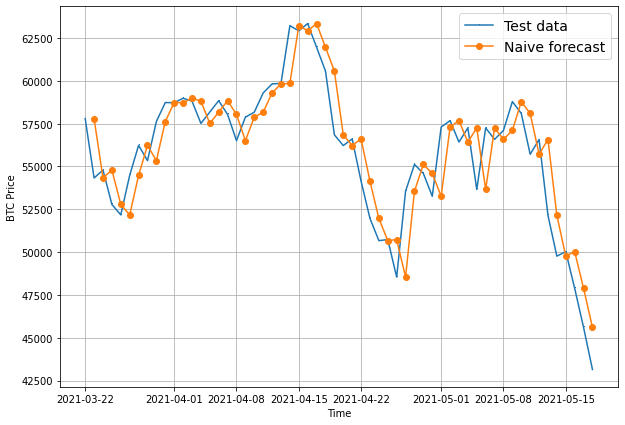

In [19]:
# Plotting naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timestamps=X_train, values=y_train, label="Train data")
plot_time_series(timestamps=X_test, values=y_test, start=500, label="Test data")
plot_time_series(timestamps=X_test[1:], values=naive_forecast, start=500, marker="o", label="Naive forecast")

In [20]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # Find MAE of Naive Forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # Seasonality of 1 day

    return mae / mae_naive_no_season

In [21]:
# Verify if MASE of Naive Forecast is 1
mean_absolute_scaled_error(
    y_true=y_test[1:],
    y_pred=naive_forecast
)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9995699939182626>

In [22]:
# Function for evaluation matrix
def evaluate_preds(y_true, y_pred):

    # Ensuring that we use float32 dtype (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculating various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
    }

In [23]:
# Evaluating naive forecast results
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

### Windowing data

In [24]:
# We want to use Bitcoin prices of the week to predict next day price
print(f"Intention is to use {btc_price[:7]} to predict {btc_price[7]}")

Intention is to use [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict 123.033


In [25]:
# Setting up global variables for window size and horizon
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data

In [26]:
# Creating function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
    return x[:, :-horizon], x[:, -horizon:]

In [27]:
# Testing window labelling function
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8) + 1, axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]])>)

In [28]:
# Creating function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):

    # 1. Creating window of specific window size
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)

    # 2. Creating 2D array of multiple windows
    window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T
    # print(f"Windows indexes: {window_indexes} with shape of {window_indexes.shape}")

    # 3. Index on the target array (time series) with 2D of multiple window steps
    windowed_array = x[window_indexes]

    # 4. Get the labelled windows
    windows, labels = get_labelled_window(windowed_array, horizon=horizon)
    return windows, labels

In [29]:
# Testing the function
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [30]:
# Viewing the first 3 windows / labels
for i in range(3):
    print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [31]:
# Viewing the last 3 windows / labels
for i in range(3):
    print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


### Splitting windows into training and testing sets

In [32]:
# Creating function to make train / test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    split_size = int(len(windows) * (1 - test_split)) # Default 80% train / 20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [33]:
# Creating training and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    full_windows, full_labels
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [34]:
# Checking the first 5 train window values
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [35]:
# Checking the first test values
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

### Modelling checkpoint callback

In [36]:
# Function to implement ModelCheckpoint callback
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(save_path, model_name),
        verbose=0,
        save_best_only=True
    )

### Model 1 - Dense model (window = 7, horizon = 1)

In [37]:
# Loading libraries
import tensorflow as tf
from tensorflow.keras import layers

# Setting random seed
tf.random.set_seed(42)

# Constructing a model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

# Compiling the model
model_1.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae", "mse"]
)

# Fitting the model
history_1 = model_1.fit(
    x=train_windows,
    y=train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_1.name)]
)

Epoch 1/100
18/18 [==============================] - 5s 171ms/step - loss: 4007.0496 - mae: 4007.0496 - mse: 41227048.0000 - val_loss: 12410.7471 - val_mae: 12410.7471 - val_mse: 271330560.0000
Epoch 2/100
18/18 [==============================] - 2s 101ms/step - loss: 757.4069 - mae: 757.4069 - mse: 2067662.5000 - val_loss: 3453.9829 - val_mae: 3453.9827 - val_mse: 24432512.0000
Epoch 3/100
18/18 [==============================] - 2s 107ms/step - loss: 285.0446 - mae: 285.0446 - mse: 304284.4688 - val_loss: 859.3107 - val_mae: 859.3107 - val_mse: 2482116.2500
Epoch 4/100
18/18 [==============================] - 2s 111ms/step - loss: 177.8318 - mae: 177.8318 - mse: 155381.3906 - val_loss: 823.7545 - val_mae: 823.7545 - val_mse: 2301871.5000
Epoch 5/100
18/18 [==============================] - 2s 104ms/step - loss: 148.2036 - mae: 148.2036 - mse: 118549.8281 - val_loss: 807.5685 - val_mae: 807.5685 - val_mse: 2219046.2500
Epoch 6/100
18/18 [==============================] - 2s 102ms/step

In [38]:
# Evaluating the model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 688.4412 - mae: 688.4412 - mse: 1439873.6250


[688.441162109375, 688.441162109375, 1439873.625]

In [39]:
# Loading the best performing model_1 run and evaluating on test data
model_1_best = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1_best.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 567.5463 - mae: 567.5463 - mse: 1166601.8750


[567.5462646484375, 567.5462646484375, 1166601.875]

In [40]:
# Creating function to make predictions
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # 1D array of predictions

In [41]:
# Making predictions with the model 1
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 3ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8671.934, 8586.085, 8856.737, 8647.604, 8547.379, 8549.002,
        8511.563, 8374.979, 8266.794, 8364.219], dtype=float32)>)

In [42]:
# Evaluting model 1 predictions
model_1_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_1_preds
)
model_1_results

{'mae': 688.44116,
 'mse': 1439873.9,
 'rmse': 1199.9474,
 'mape': 3.191842,
 'mase': 1.2094004}

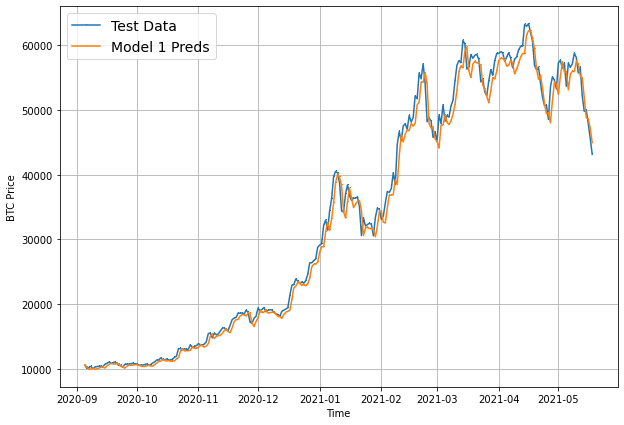

In [43]:
# Plotting model results
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, ],
    start=offset,
    label="Test Data"
)

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=model_1_preds,
    start=offset,
    label="Model 1 Preds"
)

### Model 2 - Dense model (window = 30, horizon = 1)

In [44]:
# Hyperparameters
HORIZON = 1
WINDOW_SIZE = 30

In [45]:
# Making windows data
full_windows, full_labels = make_windows(
    prices,
    window_size=WINDOW_SIZE,
    horizon=HORIZON
)
len(full_windows), len(full_labels)

(2757, 2757)

In [46]:
# Making train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    windows=full_windows,
    labels=full_labels,
    test_split=0.2
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [47]:
# Checking first 3 train windows
train_windows[:3]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
        133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
        164.31499, 177.63333, 188.29

In [48]:
# Creating a model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_2_dense")

# Compiling the model
model_2.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fitting the model
history_2 = model_2.fit(
    train_windows,
    train_labels,
    epochs=100,
    batch_size=128,
    verbose=0,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_2.name)]
)

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: mod

In [49]:
# Evaluating model 2
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 784.2819 - mae: 784.2819


[784.2819213867188, 784.2819213867188]

In [50]:
# Loading the best model 2
model_2_best = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2_best.evaluate(test_windows, test_labels)

18/18 [==============================] - 1s 5ms/step - loss: 598.8914 - mae: 598.8914


[598.8914184570312, 598.8914184570312]

In [51]:
# getting model 2 predictions
model_2_preds = make_preds(
    model_2,
    input_data=test_windows
)

18/18 [==============================] - 0s 4ms/step


In [52]:
# Evaluating results
model_2_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_2_preds
)
model_2_results

{'mae': 784.2817,
 'mse': 1812401.1,
 'rmse': 1346.2545,
 'mape': 3.7734795,
 'mase': 1.3709321}

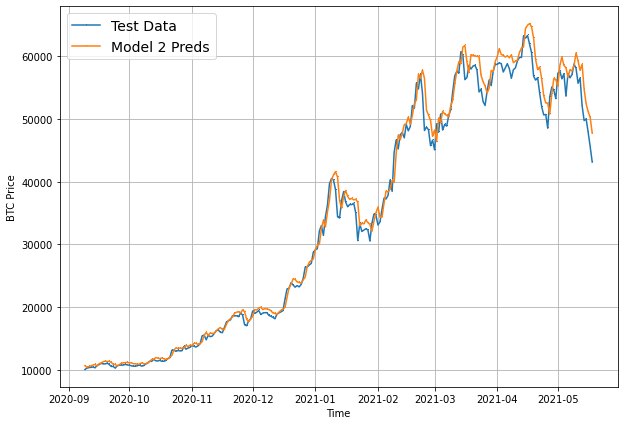

In [53]:
# Visualising model 2 results
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test Data"
)

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=model_2_preds,
    start=offset,
    label="Model 2 Preds"
)

### Model 3 - Dense model (window = 30, horizon = 7)

In [54]:
# Hyperparameters
HORIZON = 7
WINDOW_SIZE = 30

In [55]:
# Making windows data
full_windows, full_labels = make_windows(
    prices,
    window_size=WINDOW_SIZE,
    horizon=HORIZON
)
len(full_windows), len(full_labels)

(2751, 2751)

In [56]:
# Making train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    windows=full_windows,
    labels=full_labels,
    test_split=0.2
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [57]:
# Creating a model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3_dense")

# Compiling the model
model_3.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fitting the model
history_3 = model_3.fit(
    train_windows,
    train_labels,
    epochs=100,
    batch_size=128,
    verbose=0,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_3.name)]
)

INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: mod

In [58]:
# Evaluating model 3
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 1384.6562 - mae: 1384.6562


[1384.65625, 1384.65625]

In [59]:
# Making predictions with model 3
model_3_preds = make_preds(
    model_3,
    input_data=test_windows
)
model_3_preds[:3]

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[9135.213 , 9275.13  , 9164.792 , 9187.782 , 9059.964 , 9088.129 ,
        9169.896 ],
       [8861.149 , 9084.112 , 8815.979 , 8945.273 , 8784.909 , 8803.223 ,
        8957.3955],
       [8679.332 , 8954.706 , 8856.328 , 8890.657 , 8646.648 , 8641.01  ,
        8946.8955]], dtype=float32)>

In [60]:
# Evaluating model 3 preds
model_3_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_3_preds
)
model_3_results

{'mae': array([ 361.2002  ,  141.89299 ,  215.70312 ,  271.39957 ,  277.07156 ,
         281.95877 ,  312.0847  ,  297.3296  ,  300.16504 ,  426.57233 ,
         547.659   ,  602.67883 ,  640.4925  ,  705.519   ,  440.72336 ,
         253.92836 ,  273.78033 ,  491.44635 ,  529.70294 ,  537.99225 ,
         270.3372  ,  154.62486 ,  138.1451  ,  161.63797 ,  147.34193 ,
         187.22998 ,  276.5844  ,  321.8609  ,  267.86545 ,  135.39551 ,
         127.33175 ,   83.5203  ,  137.4407  ,  138.9119  ,  190.29799 ,
         215.46672 ,  208.54256 ,  268.1001  ,  254.50084 ,  427.12094 ,
         705.5205  ,  319.45502 ,  272.7896  ,  290.34653 ,  125.14042 ,
         137.82938 ,  214.36203 ,  202.04611 ,  146.97984 ,  231.40506 ,
         221.4924  ,  251.32275 ,  163.51039 ,  281.15317 ,  398.36664 ,
         516.9759  ,  787.78326 ,  761.2424  ,  833.1632  ,  804.15186 ,
         609.4985  ,  415.35547 ,  424.21484 ,  584.49567 ,  602.3793  ,
         713.7104  ,  675.3514  ,  780.826  

In [61]:
# Function for evaluation matrix
# MAKING IT WORK FOR HIGHER HORIZON
def evaluate_preds(y_true, y_pred):

    # Ensuring that we use float32 dtype (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculating various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    # Account for different size metrics
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
    }

In [62]:
# Re-evaluating model 3 preds
model_3_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_3_preds
)
model_3_results

{'mae': 1384.6562,
 'mse': 6027057.0,
 'rmse': 1556.4397,
 'mape': 6.17022,
 'mase': 2.4639182}

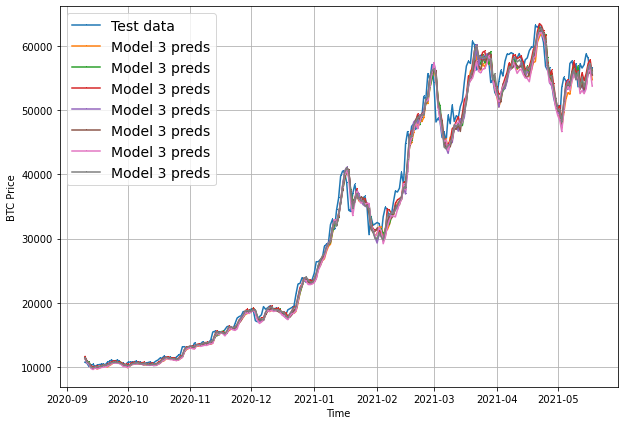

In [63]:
# Visualising the data
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test data"
)
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=model_3_preds,
    start=offset,
    label="Model 3 preds"
)

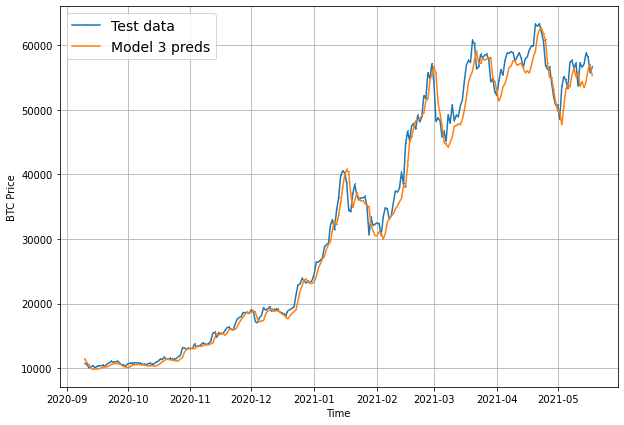

In [64]:
# Visualising the data
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test data"
)
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=tf.reduce_mean(model_3_preds, axis=1),
    start=offset,
    label="Model 3 preds"
)

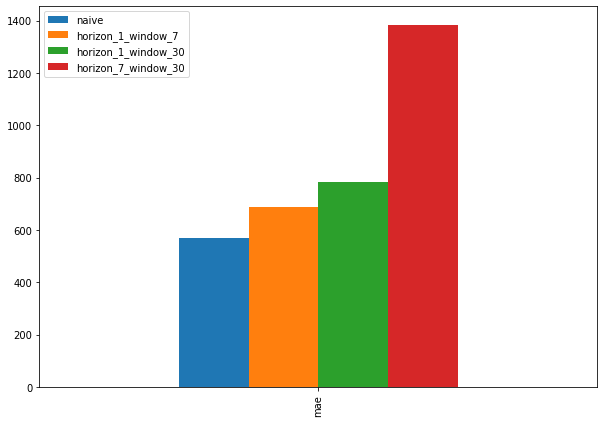

In [65]:
# Comparing models performance
pd.DataFrame({
    "naive": naive_results["mae"],
    "horizon_1_window_7": model_1_results["mae"],
    "horizon_1_window_30": model_2_results["mae"],
    "horizon_7_window_30": model_3_results["mae"]
}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

### Model 4 - Using Conv1D

In [66]:
# Defining horizon and window
HORIZON = 1
WINDOW_SIZE = 7

In [67]:
# Creating windowed data
full_windows,full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [68]:
# Creating train / test datasets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [69]:
# Checking data input shape
train_windows[0].shape # returns WINDOW_SIZE

(7,)

In [70]:
# Conv1D expects input of (batch_size, timestamps, input_dim)

In [71]:
# Reshaping the tensor
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [72]:
# Creating Lambda layer
expand_dim_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [73]:
# Testing Lambda layer
print(f"Original shape: {x.shape}") # Output WINDOW_SIZE
print(f"Expanded shape: {expand_dim_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dim_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [74]:
# Creating Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_Conv1D")

# Compiling the model
model_4.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam()
)

# Fitting the model
history_4 = model_4.fit(
    train_windows,
    train_labels,
    batch_size=128,
    epochs=100,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_4.name)]
)

Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 2433.2502 

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 4s 157ms/step - loss: 1957.2834 - val_loss: 1936.7765
Epoch 2/100
10/18 [===============>..............] - ETA: 0s - loss: 350.5321

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 131ms/step - loss: 310.9225 - val_loss: 1487.7366
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 224.9273

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 3s 163ms/step - loss: 223.0391 - val_loss: 1074.2041
Epoch 4/100
10/18 [===============>..............] - ETA: 0s - loss: 210.4687

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 3s 157ms/step - loss: 193.9775 - val_loss: 1057.4503
Epoch 5/100
18/18 [==============================] - 0s 14ms/step - loss: 188.7275 - val_loss: 1057.7765
Epoch 6/100
10/18 [===============>..............] - ETA: 0s - loss: 183.0593

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 3s 173ms/step - loss: 186.0392 - val_loss: 1042.2152
Epoch 7/100
10/18 [===============>..............] - ETA: 0s - loss: 201.5857

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 3s 171ms/step - loss: 184.4964 - val_loss: 1017.9037
Epoch 8/100
18/18 [==============================] - 0s 12ms/step - loss: 179.9897 - val_loss: 1019.2964
Epoch 9/100
18/18 [==============================] - 0s 14ms/step - loss: 177.6170 - val_loss: 1019.9977
Epoch 10/100
11/18 [=================>............] - ETA: 0s - loss: 170.7297

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 3s 180ms/step - loss: 175.1866 - val_loss: 983.6668
Epoch 11/100
10/18 [===============>..............] - ETA: 0s - loss: 172.0530

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 139ms/step - loss: 172.4819 - val_loss: 957.4807
Epoch 12/100
18/18 [==============================] - 0s 12ms/step - loss: 173.5771 - val_loss: 971.0542
Epoch 13/100
18/18 [==============================] - 0s 11ms/step - loss: 168.7509 - val_loss: 988.3019
Epoch 14/100
11/18 [=================>............] - ETA: 0s - loss: 157.8657

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 137ms/step - loss: 164.5859 - val_loss: 935.6375
Epoch 15/100
10/18 [===============>..............] - ETA: 0s - loss: 160.8758

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 130ms/step - loss: 162.7506 - val_loss: 930.9359
Epoch 16/100
11/18 [=================>............] - ETA: 0s - loss: 159.5488

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 128ms/step - loss: 158.0888 - val_loss: 891.0103
Epoch 17/100
10/18 [===============>..............] - ETA: 0s - loss: 162.5710

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 130ms/step - loss: 155.9351 - val_loss: 885.7017
Epoch 18/100
18/18 [==============================] - 0s 13ms/step - loss: 153.9314 - val_loss: 905.6485
Epoch 19/100
10/18 [===============>..............] - ETA: 0s - loss: 149.6201

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 134ms/step - loss: 150.0755 - val_loss: 862.5021
Epoch 20/100
10/18 [===============>..............] - ETA: 0s - loss: 155.0462

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 129ms/step - loss: 148.3685 - val_loss: 814.7802
Epoch 21/100
11/18 [=================>............] - ETA: 0s - loss: 154.4501

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 137ms/step - loss: 146.9930 - val_loss: 802.5214
Epoch 22/100
18/18 [==============================] - 0s 11ms/step - loss: 144.7319 - val_loss: 806.9144
Epoch 23/100
18/18 [==============================] - 0s 11ms/step - loss: 141.0359 - val_loss: 812.4698
Epoch 24/100
10/18 [===============>..............] - ETA: 0s - loss: 137.5090

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 129ms/step - loss: 139.9136 - val_loss: 782.2410
Epoch 25/100
10/18 [===============>..............] - ETA: 0s - loss: 146.3406

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 131ms/step - loss: 137.6126 - val_loss: 760.4651
Epoch 26/100
12/18 [===================>..........] - ETA: 0s - loss: 135.0341

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 3s 155ms/step - loss: 135.2925 - val_loss: 744.9898
Epoch 27/100
10/18 [===============>..............] - ETA: 0s - loss: 137.6311

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 3s 180ms/step - loss: 134.2283 - val_loss: 734.6909
Epoch 28/100
11/18 [=================>............] - ETA: 0s - loss: 134.2328

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 127ms/step - loss: 131.0950 - val_loss: 726.5063
Epoch 29/100
10/18 [===============>..............] - ETA: 0s - loss: 132.9458

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 3s 157ms/step - loss: 129.4857 - val_loss: 716.2932
Epoch 30/100
18/18 [==============================] - 0s 13ms/step - loss: 132.0207 - val_loss: 783.7232
Epoch 31/100
18/18 [==============================] - 0s 12ms/step - loss: 136.9952 - val_loss: 837.7471
Epoch 32/100
10/18 [===============>..............] - ETA: 0s - loss: 136.7599

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 139ms/step - loss: 134.7739 - val_loss: 709.9960
Epoch 33/100
10/18 [===============>..............] - ETA: 0s - loss: 135.4610

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 133ms/step - loss: 129.7934 - val_loss: 688.4589
Epoch 34/100
11/18 [=================>............] - ETA: 0s - loss: 130.6494

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 131ms/step - loss: 124.1504 - val_loss: 681.0615
Epoch 35/100
11/18 [=================>............] - ETA: 0s - loss: 127.3346

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 142ms/step - loss: 122.7607 - val_loss: 678.5042
Epoch 36/100
18/18 [==============================] - 0s 10ms/step - loss: 124.6075 - val_loss: 734.5976
Epoch 37/100
12/18 [===================>..........] - ETA: 0s - loss: 120.9061

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 120ms/step - loss: 123.1404 - val_loss: 661.8198
Epoch 38/100
 9/18 [==============>...............] - ETA: 0s - loss: 128.9616

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 136ms/step - loss: 122.7638 - val_loss: 660.4111
Epoch 39/100
18/18 [==============================] - 0s 11ms/step - loss: 124.0213 - val_loss: 744.8420
Epoch 40/100
10/18 [===============>..............] - ETA: 0s - loss: 122.8829

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 124ms/step - loss: 121.1617 - val_loss: 646.3682
Epoch 41/100
11/18 [=================>............] - ETA: 0s - loss: 124.5624

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 3s 160ms/step - loss: 119.2771 - val_loss: 641.9727
Epoch 42/100
18/18 [==============================] - 0s 12ms/step - loss: 120.4712 - val_loss: 645.4231
Epoch 43/100
18/18 [==============================] - 0s 12ms/step - loss: 118.4346 - val_loss: 649.9880
Epoch 44/100
11/18 [=================>............] - ETA: 0s - loss: 114.3921

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 130ms/step - loss: 119.1260 - val_loss: 634.4709
Epoch 45/100
18/18 [==============================] - 0s 11ms/step - loss: 117.6215 - val_loss: 637.1133
Epoch 46/100
13/18 [====================>.........] - ETA: 0s - loss: 120.0048

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 135ms/step - loss: 116.6925 - val_loss: 626.2966
Epoch 47/100
18/18 [==============================] - 0s 15ms/step - loss: 118.8630 - val_loss: 698.3367
Epoch 48/100
11/18 [=================>............] - ETA: 0s - loss: 113.2699

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 142ms/step - loss: 115.6263 - val_loss: 624.7383
Epoch 49/100
11/18 [=================>............] - ETA: 0s - loss: 121.3394

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 140ms/step - loss: 115.0918 - val_loss: 614.7723
Epoch 50/100
12/18 [===================>..........] - ETA: 0s - loss: 113.3546

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 128ms/step - loss: 115.1898 - val_loss: 613.3945
Epoch 51/100
16/18 [=========================>....] - ETA: 0s - loss: 115.9245

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 130ms/step - loss: 115.5194 - val_loss: 612.0534
Epoch 52/100
18/18 [==============================] - 0s 11ms/step - loss: 115.9012 - val_loss: 613.3531
Epoch 53/100
18/18 [==============================] - 0s 10ms/step - loss: 116.6332 - val_loss: 638.5961
Epoch 54/100
18/18 [==============================] - 0s 12ms/step - loss: 122.3024 - val_loss: 751.1862
Epoch 55/100
18/18 [==============================] - ETA: 0s - loss: 117.8304

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 122ms/step - loss: 117.8304 - val_loss: 608.0215
Epoch 56/100
18/18 [==============================] - 0s 11ms/step - loss: 115.5514 - val_loss: 812.2017
Epoch 57/100
10/18 [===============>..............] - ETA: 0s - loss: 140.1053

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 124ms/step - loss: 140.7977 - val_loss: 598.9823
Epoch 58/100
18/18 [==============================] - 0s 11ms/step - loss: 120.6743 - val_loss: 619.6700
Epoch 59/100
18/18 [==============================] - 0s 10ms/step - loss: 111.5787 - val_loss: 621.9963
Epoch 60/100
18/18 [==============================] - 0s 10ms/step - loss: 113.5630 - val_loss: 607.8707
Epoch 61/100
18/18 [==============================] - 0s 10ms/step - loss: 112.0140 - val_loss: 603.4675
Epoch 62/100
11/18 [=================>............] - ETA: 0s - loss: 105.3273

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 119ms/step - loss: 110.7858 - val_loss: 594.1759
Epoch 63/100
18/18 [==============================] - 0s 11ms/step - loss: 112.3696 - val_loss: 602.5347
Epoch 64/100
18/18 [==============================] - 0s 11ms/step - loss: 112.7597 - val_loss: 681.9071
Epoch 65/100
18/18 [==============================] - 0s 10ms/step - loss: 118.2529 - val_loss: 601.2707
Epoch 66/100
11/18 [=================>............] - ETA: 0s - loss: 107.8133

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 115ms/step - loss: 111.9537 - val_loss: 588.0956
Epoch 67/100
18/18 [==============================] - 0s 10ms/step - loss: 110.5645 - val_loss: 682.7881
Epoch 68/100
18/18 [==============================] - 0s 11ms/step - loss: 117.0207 - val_loss: 721.9029
Epoch 69/100
18/18 [==============================] - 0s 10ms/step - loss: 126.4995 - val_loss: 669.3276
Epoch 70/100
18/18 [==============================] - 0s 10ms/step - loss: 119.6697 - val_loss: 589.0697
Epoch 71/100
18/18 [==============================] - 0s 10ms/step - loss: 111.5042 - val_loss: 599.1649
Epoch 72/100
18/18 [==============================] - 0s 10ms/step - loss: 111.2223 - val_loss: 598.3698
Epoch 73/100
18/18 [==============================] - 0s 10ms/step - loss: 111.0892 - val_loss: 599.7407
Epoch 74/100
10/18 [===============>..............] - ETA: 0s - loss: 110.6735

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 144ms/step - loss: 111.3124 - val_loss: 582.5839
Epoch 75/100
18/18 [==============================] - 0s 11ms/step - loss: 109.4547 - val_loss: 603.4825
Epoch 76/100
13/18 [====================>.........] - ETA: 0s - loss: 110.5632

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 119ms/step - loss: 110.2695 - val_loss: 580.4684
Epoch 77/100
18/18 [==============================] - 0s 10ms/step - loss: 113.0057 - val_loss: 584.7972
Epoch 78/100
18/18 [==============================] - 0s 10ms/step - loss: 110.5828 - val_loss: 580.8672
Epoch 79/100
18/18 [==============================] - 0s 11ms/step - loss: 110.5196 - val_loss: 611.2825
Epoch 80/100
12/18 [===================>..........] - ETA: 0s - loss: 117.5051

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 115ms/step - loss: 111.3139 - val_loss: 577.8762
Epoch 81/100
18/18 [==============================] - 0s 11ms/step - loss: 108.2283 - val_loss: 578.8629
Epoch 82/100
18/18 [==============================] - 0s 12ms/step - loss: 115.6611 - val_loss: 580.7465
Epoch 83/100
18/18 [==============================] - 0s 10ms/step - loss: 110.6806 - val_loss: 638.7534
Epoch 84/100
18/18 [==============================] - 0s 10ms/step - loss: 110.8995 - val_loss: 586.8862
Epoch 85/100
18/18 [==============================] - 0s 11ms/step - loss: 108.7578 - val_loss: 601.0334
Epoch 86/100
18/18 [==============================] - 0s 10ms/step - loss: 109.7701 - val_loss: 628.7010
Epoch 87/100
11/18 [=================>............] - ETA: 0s - loss: 112.8955

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 3s 154ms/step - loss: 109.7482 - val_loss: 574.3805
Epoch 88/100
18/18 [==============================] - 0s 11ms/step - loss: 109.5173 - val_loss: 604.2728
Epoch 89/100
18/18 [==============================] - 0s 10ms/step - loss: 112.3573 - val_loss: 575.4910
Epoch 90/100
18/18 [==============================] - 0s 11ms/step - loss: 108.1410 - val_loss: 649.8559
Epoch 91/100
18/18 [==============================] - 0s 11ms/step - loss: 113.4838 - val_loss: 599.1124
Epoch 92/100
18/18 [==============================] - 0s 11ms/step - loss: 109.9520 - val_loss: 577.3645
Epoch 93/100
18/18 [==============================] - 0s 11ms/step - loss: 112.7057 - val_loss: 614.4545
Epoch 94/100
18/18 [==============================] - 0s 10ms/step - loss: 109.6035 - val_loss: 575.4159
Epoch 95/100
10/18 [===============>..............] - ETA: 0s - loss: 104.1000

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 131ms/step - loss: 108.4432 - val_loss: 572.9658
Epoch 96/100
18/18 [==============================] - 0s 11ms/step - loss: 113.9171 - val_loss: 587.8245
Epoch 97/100
18/18 [==============================] - 0s 11ms/step - loss: 109.1693 - val_loss: 602.5687
Epoch 98/100
13/18 [====================>.........] - ETA: 0s - loss: 112.6980

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 128ms/step - loss: 110.3713 - val_loss: 572.7327
Epoch 99/100
18/18 [==============================] - 0s 12ms/step - loss: 110.4670 - val_loss: 575.2117
Epoch 100/100
18/18 [==============================] - 0s 11ms/step - loss: 115.2845 - val_loss: 615.1186


In [75]:
# Checking the model structure
model_4.summary()

Model: "model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [76]:
# Evaluating the model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 615.1187


615.11865234375

In [77]:
# Loading back the best performing model
model_4 = tf.keras.models.load_model("./model_experiments/model_4_Conv1D/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 572.7327


572.7327270507812

In [78]:
# Making predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8895.423 , 8796.867 , 9017.47  , 8789.132 , 8732.446 , 8751.425 ,
       8685.227 , 8531.7295, 8469.914 , 8524.512 ], dtype=float32)>

In [79]:
# Evaluating predictions
model_4_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_4_preds
)
model_4_results

{'mae': 572.73267,
 'mse': 1188559.0,
 'rmse': 1090.2106,
 'mape': 2.55858,
 'mase': 1.0061326}

### Model 5 - LSTM (RNN)

In [80]:
# Building LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=outputs, name="module_5_LSTM")

# Compiling the model
model_5.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam()
)

# Fitting the model
history_5 = model_5.fit(
    train_windows,
    train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_5.name)]
)

Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 2421.9397INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 12s 455ms/step - loss: 2371.5613 - val_loss: 9216.8867
Epoch 2/100
15/18 [========================>.....] - ETA: 0s - loss: 835.1866INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 387ms/step - loss: 746.4938 - val_loss: 1009.2003
Epoch 3/100
18/18 [==============================] - 0s 17ms/step - loss: 237.4997 - val_loss: 1190.8657
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 188.1680INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 348ms/step - loss: 187.9243 - val_loss: 997.5119
Epoch 5/100
16/18 [=========================>....] - ETA: 0s - loss: 179.8460INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 355ms/step - loss: 177.0883 - val_loss: 982.0405
Epoch 6/100
18/18 [==============================] - 0s 17ms/step - loss: 174.4352 - val_loss: 1030.4166
Epoch 7/100
18/18 [==============================] - 0s 17ms/step - loss: 172.9799 - val_loss: 987.0887
Epoch 8/100
17/18 [===========================>..] - ETA: 0s - loss: 170.6993INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 392ms/step - loss: 171.1247 - val_loss: 971.0656
Epoch 9/100
15/18 [========================>.....] - ETA: 0s - loss: 172.0422INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 324ms/step - loss: 169.5391 - val_loss: 965.1445
Epoch 10/100
16/18 [=========================>....] - ETA: 0s - loss: 165.5718INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 317ms/step - loss: 167.9422 - val_loss: 894.5148
Epoch 11/100
18/18 [==============================] - 0s 21ms/step - loss: 166.5443 - val_loss: 929.8476
Epoch 12/100
18/18 [==============================] - 0s 17ms/step - loss: 166.2980 - val_loss: 929.7093
Epoch 13/100
18/18 [==============================] - 0s 23ms/step - loss: 163.7087 - val_loss: 922.4194
Epoch 14/100
18/18 [==============================] - 0s 23ms/step - loss: 162.4912 - val_loss: 957.8100
Epoch 15/100
18/18 [==============================] - 0s 22ms/step - loss: 161.9158 - val_loss: 903.9231
Epoch 16/100
17/18 [===========================>..] - ETA: 0s - loss: 160.4202INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 329ms/step - loss: 158.8282 - val_loss: 884.3442
Epoch 17/100
18/18 [==============================] - 0s 21ms/step - loss: 156.8546 - val_loss: 963.1850
Epoch 18/100
18/18 [==============================] - 0s 19ms/step - loss: 157.3051 - val_loss: 965.8174
Epoch 19/100
18/18 [==============================] - 0s 19ms/step - loss: 154.4878 - val_loss: 912.8769
Epoch 20/100
15/18 [========================>.....] - ETA: 0s - loss: 153.1074INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 335ms/step - loss: 152.0521 - val_loss: 845.4094
Epoch 21/100
18/18 [==============================] - 0s 24ms/step - loss: 150.0498 - val_loss: 845.6110
Epoch 22/100
18/18 [==============================] - 0s 23ms/step - loss: 147.8645 - val_loss: 851.9251
Epoch 23/100
18/18 [==============================] - 0s 21ms/step - loss: 146.1749 - val_loss: 854.5245
Epoch 24/100
16/18 [=========================>....] - ETA: 0s - loss: 144.3774INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 307ms/step - loss: 144.3983 - val_loss: 835.0398
Epoch 25/100
16/18 [=========================>....] - ETA: 0s - loss: 145.6910INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 307ms/step - loss: 142.4411 - val_loss: 818.3401
Epoch 26/100
17/18 [===========================>..] - ETA: 0s - loss: 140.3958INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 313ms/step - loss: 140.7531 - val_loss: 791.4568
Epoch 27/100
15/18 [========================>.....] - ETA: 0s - loss: 139.4453INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 378ms/step - loss: 139.2030 - val_loss: 781.8694
Epoch 28/100
17/18 [===========================>..] - ETA: 0s - loss: 137.6758INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 358ms/step - loss: 137.7106 - val_loss: 762.8488
Epoch 29/100
18/18 [==============================] - 0s 26ms/step - loss: 137.2385 - val_loss: 767.5295
Epoch 30/100
18/18 [==============================] - 0s 27ms/step - loss: 138.7951 - val_loss: 800.8184
Epoch 31/100
16/18 [=========================>....] - ETA: 0s - loss: 135.0812INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 328ms/step - loss: 135.3250 - val_loss: 735.8617
Epoch 32/100
18/18 [==============================] - 0s 26ms/step - loss: 131.4523 - val_loss: 750.4908
Epoch 33/100
18/18 [==============================] - 0s 24ms/step - loss: 131.4811 - val_loss: 756.0487
Epoch 34/100
15/18 [========================>.....] - ETA: 0s - loss: 130.8351INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 330ms/step - loss: 131.8369 - val_loss: 718.2570
Epoch 35/100
18/18 [==============================] - ETA: 0s - loss: 128.6525INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 326ms/step - loss: 128.6525 - val_loss: 714.2510
Epoch 36/100
17/18 [===========================>..] - ETA: 0s - loss: 130.0329INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 430ms/step - loss: 130.6542 - val_loss: 703.0602
Epoch 37/100
18/18 [==============================] - 0s 22ms/step - loss: 125.4134 - val_loss: 708.0537
Epoch 38/100
15/18 [========================>.....] - ETA: 0s - loss: 125.5434INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 349ms/step - loss: 124.2733 - val_loss: 686.6796
Epoch 39/100
18/18 [==============================] - 0s 27ms/step - loss: 124.4825 - val_loss: 705.8343
Epoch 40/100
18/18 [==============================] - 0s 23ms/step - loss: 127.3972 - val_loss: 709.2642
Epoch 41/100
17/18 [===========================>..] - ETA: 0s - loss: 124.2163INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 355ms/step - loss: 123.2764 - val_loss: 669.2697
Epoch 42/100
18/18 [==============================] - ETA: 0s - loss: 121.7533INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 351ms/step - loss: 121.7533 - val_loss: 665.0228
Epoch 43/100
16/18 [=========================>....] - ETA: 0s - loss: 122.9939INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 366ms/step - loss: 121.1910 - val_loss: 664.1688
Epoch 44/100
18/18 [==============================] - ETA: 0s - loss: 121.4160INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 334ms/step - loss: 121.4160 - val_loss: 662.6330
Epoch 45/100
18/18 [==============================] - ETA: 0s - loss: 118.6749INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 326ms/step - loss: 118.6749 - val_loss: 652.9092
Epoch 46/100
16/18 [=========================>....] - ETA: 0s - loss: 119.3827INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 360ms/step - loss: 118.5755 - val_loss: 646.9376
Epoch 47/100
17/18 [===========================>..] - ETA: 0s - loss: 119.4717INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 354ms/step - loss: 119.3426 - val_loss: 646.7082
Epoch 48/100
16/18 [=========================>....] - ETA: 0s - loss: 117.4376INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 359ms/step - loss: 118.5992 - val_loss: 641.4430
Epoch 49/100
18/18 [==============================] - 1s 33ms/step - loss: 117.2549 - val_loss: 653.7988
Epoch 50/100
18/18 [==============================] - 1s 34ms/step - loss: 119.6667 - val_loss: 668.6154
Epoch 51/100
18/18 [==============================] - 1s 30ms/step - loss: 118.0162 - val_loss: 660.1438
Epoch 52/100
16/18 [=========================>....] - ETA: 0s - loss: 118.2109INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 329ms/step - loss: 115.8316 - val_loss: 629.2118
Epoch 53/100
14/18 [======================>.......] - ETA: 0s - loss: 116.2931INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 3s 196ms/step - loss: 115.9388 - val_loss: 625.1064
Epoch 54/100
18/18 [==============================] - 0s 14ms/step - loss: 116.2689 - val_loss: 633.8309
Epoch 55/100
14/18 [======================>.......] - ETA: 0s - loss: 119.4022INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 259ms/step - loss: 115.1192 - val_loss: 622.0493
Epoch 56/100
18/18 [==============================] - 0s 21ms/step - loss: 116.0895 - val_loss: 625.2596
Epoch 57/100
18/18 [==============================] - 0s 25ms/step - loss: 120.8967 - val_loss: 644.3082
Epoch 58/100
15/18 [========================>.....] - ETA: 0s - loss: 115.4650INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 375ms/step - loss: 114.6459 - val_loss: 615.5740
Epoch 59/100
18/18 [==============================] - 0s 27ms/step - loss: 114.2189 - val_loss: 619.6680
Epoch 60/100
16/18 [=========================>....] - ETA: 0s - loss: 114.6947INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 381ms/step - loss: 114.0363 - val_loss: 611.9445
Epoch 61/100
18/18 [==============================] - 0s 28ms/step - loss: 113.2055 - val_loss: 627.0546
Epoch 62/100
18/18 [==============================] - 1s 34ms/step - loss: 115.4735 - val_loss: 638.9651
Epoch 63/100
18/18 [==============================] - 1s 34ms/step - loss: 117.6406 - val_loss: 616.1917
Epoch 64/100
18/18 [==============================] - 1s 30ms/step - loss: 112.5023 - val_loss: 629.2805
Epoch 65/100
16/18 [=========================>....] - ETA: 0s - loss: 113.5855INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 8s 456ms/step - loss: 114.0604 - val_loss: 607.2084
Epoch 66/100
18/18 [==============================] - 0s 26ms/step - loss: 111.9404 - val_loss: 615.1084
Epoch 67/100
16/18 [=========================>....] - ETA: 0s - loss: 110.2749INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 341ms/step - loss: 113.0697 - val_loss: 601.4708
Epoch 68/100
18/18 [==============================] - 1s 29ms/step - loss: 114.1177 - val_loss: 631.9710
Epoch 69/100
18/18 [==============================] - 0s 25ms/step - loss: 119.3491 - val_loss: 604.4426
Epoch 70/100
16/18 [=========================>....] - ETA: 0s - loss: 112.9036INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 330ms/step - loss: 112.5052 - val_loss: 597.9636
Epoch 71/100
18/18 [==============================] - 1s 29ms/step - loss: 111.7515 - val_loss: 617.0255
Epoch 72/100
16/18 [=========================>....] - ETA: 0s - loss: 111.7148INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 322ms/step - loss: 113.4119 - val_loss: 596.2440
Epoch 73/100
16/18 [=========================>....] - ETA: 0s - loss: 111.3228INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 404ms/step - loss: 110.8442 - val_loss: 595.2715
Epoch 74/100
18/18 [==============================] - 0s 27ms/step - loss: 112.2077 - val_loss: 612.0499
Epoch 75/100
18/18 [==============================] - 0s 27ms/step - loss: 112.2278 - val_loss: 653.8760
Epoch 76/100
18/18 [==============================] - 0s 27ms/step - loss: 113.0214 - val_loss: 615.6949
Epoch 77/100
18/18 [==============================] - 0s 27ms/step - loss: 113.4618 - val_loss: 653.2994
Epoch 78/100
18/18 [==============================] - 0s 28ms/step - loss: 115.0931 - val_loss: 635.4712
Epoch 79/100
16/18 [=========================>....] - ETA: 0s - loss: 114.6827INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 321ms/step - loss: 112.8545 - val_loss: 595.0032
Epoch 80/100
18/18 [==============================] - 1s 28ms/step - loss: 110.2676 - val_loss: 603.1168
Epoch 81/100
18/18 [==============================] - 0s 27ms/step - loss: 111.5054 - val_loss: 612.4307
Epoch 82/100
16/18 [=========================>....] - ETA: 0s - loss: 112.1634INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 324ms/step - loss: 112.9317 - val_loss: 589.8746
Epoch 83/100
18/18 [==============================] - 0s 28ms/step - loss: 111.9908 - val_loss: 603.3369
Epoch 84/100
18/18 [==============================] - 1s 28ms/step - loss: 111.2260 - val_loss: 597.6495
Epoch 85/100
18/18 [==============================] - 1s 28ms/step - loss: 110.9001 - val_loss: 622.4871
Epoch 86/100
18/18 [==============================] - 0s 26ms/step - loss: 113.3332 - val_loss: 609.1788
Epoch 87/100
18/18 [==============================] - ETA: 0s - loss: 112.8216INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 321ms/step - loss: 112.8216 - val_loss: 586.4045
Epoch 88/100
18/18 [==============================] - 1s 29ms/step - loss: 109.7044 - val_loss: 586.7393
Epoch 89/100
18/18 [==============================] - 1s 28ms/step - loss: 109.4648 - val_loss: 618.3392
Epoch 90/100
18/18 [==============================] - 0s 26ms/step - loss: 114.5082 - val_loss: 649.4104
Epoch 91/100
18/18 [==============================] - 0s 27ms/step - loss: 113.6378 - val_loss: 623.0095
Epoch 92/100
18/18 [==============================] - 0s 27ms/step - loss: 110.7752 - val_loss: 589.6387
Epoch 93/100
18/18 [==============================] - 1s 28ms/step - loss: 110.5001 - val_loss: 586.6736
Epoch 94/100
18/18 [==============================] - ETA: 0s - loss: 109.3681INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 331ms/step - loss: 109.3681 - val_loss: 583.6395
Epoch 95/100
18/18 [==============================] - 0s 26ms/step - loss: 109.0304 - val_loss: 590.0118
Epoch 96/100
18/18 [==============================] - 0s 25ms/step - loss: 109.9173 - val_loss: 587.3716
Epoch 97/100
18/18 [==============================] - 0s 27ms/step - loss: 109.8459 - val_loss: 609.8384
Epoch 98/100
16/18 [=========================>....] - ETA: 0s - loss: 110.8334INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 352ms/step - loss: 109.3810 - val_loss: 583.0190
Epoch 99/100
16/18 [=========================>....] - ETA: 0s - loss: 108.1095INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 325ms/step - loss: 109.1642 - val_loss: 581.3145
Epoch 100/100
18/18 [==============================] - 1s 28ms/step - loss: 115.3428 - val_loss: 623.2601


In [81]:
# Loading the best version
model_5 = tf.keras.models.load_model("model_experiments/module_5_LSTM/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 1s 7ms/step - loss: 581.3145


581.3145141601562

In [82]:
# Making predictions
model_5_preds = make_preds(model_5, test_windows)
model_5_preds

18/18 [==============================] - 1s 6ms/step


<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8952.35  ,  8815.697 ,  8999.064 ,  8829.317 ,  8756.238 ,
        8746.996 ,  8732.072 ,  8550.15  ,  8490.318 ,  8534.546 ,
        8312.19  ,  8155.385 ,  8081.8535,  7756.4277,  7347.551 ,
        7259.244 ,  7095.9844,  7144.417 ,  7124.474 ,  7444.5967,
        7434.205 ,  7695.5317,  7619.839 ,  7501.8213,  7363.1553,
        7352.7256,  7254.673 ,  7351.204 ,  7491.8535,  7563.213 ,
        7574.8735,  7433.6904,  7304.5605,  7222.015 ,  7207.5312,
        7228.234 ,  7137.7417,  7125.7295,  6957.5273,  6688.833 ,
        7188.293 ,  7227.5923,  7204.4707,  7234.24  ,  7330.88  ,
        7224.3877,  7230.4756,  7250.123 ,  7220.718 ,  7232.1733,
        7315.0547,  7394.815 ,  7318.0703,  7232.6226,  7199.4253,
        7040.05  ,  7211.5415,  7327.139 ,  7389.6943,  7632.1504,
        8004.829 ,  8134.265 ,  7941.0415,  8074.7524,  8131.144 ,
        8187.094 ,  8138.855 ,  8615.807 ,  8858.505 ,  8831.517 ,
        8915.6

In [83]:
# Evaluating predictions
model_5_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_5_preds
)
model_5_results

{'mae': 581.3145,
 'mse': 1223140.4,
 'rmse': 1105.9568,
 'mape': 2.6296616,
 'mase': 1.0212086}

In [84]:
# Adding Blockchain halving events
block_reward_1 = 50 # 3 January 2009
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Adding block reward dates
block_reward_2_datetime = np.datetime64("2012-11-08")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")


In [85]:
# Creating date ranges
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

block_reward_2_days, block_reward_3_days

(1012, 2421)

In [86]:
# Adding in block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Adding in block_reward values
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [87]:
# Check top 5 values
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [88]:
# Checking 5 mid values
bitcoin_prices_block[1500:1505]

,Price,block_reward
Date,,
2017-11-09,7342.82375,12.5
2017-11-10,7250.77000,12.5
2017-11-11,6773.69500,12.5
2017-11-12,6075.30125,12.5
2017-11-13,5969.13000,12.5


In [89]:
# Checking last 5 values
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<AxesSubplot:xlabel='Date'>

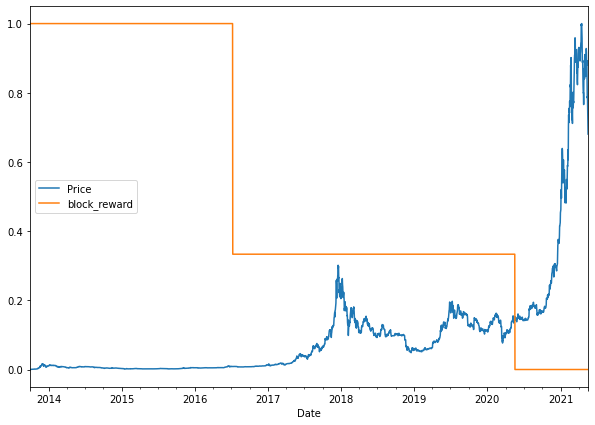

In [90]:
# Plotting block reward vs price over time
from sklearn.preprocessing import minmax_scale

scaled_price_block_df = pd.DataFrame(
    minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
    columns=bitcoin_prices_block.columns,
    index=bitcoin_prices_block.index
)
scaled_price_block_df.plot(figsize=(10, 7))

### Creating windowed multi-variate dataset with pandas

In [91]:
# Setting up hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [92]:
# Making a copy of Bitcoin dataset
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Adding windowed column
for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f"Price+{i + 1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [93]:
# Creating X (windows) and y (horizon)
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

X.head(), y.head()

(            block_reward     Price+1     Price+2     Price+3     Price+4  \
 Date                                                                       
 2013-10-08          25.0  121.794998  120.655327  121.338661  118.674660   
 2013-10-09          25.0  123.032997  121.794998  120.655327  121.338661   
 2013-10-10          25.0  124.049004  123.032997  121.794998  120.655327   
 2013-10-11          25.0  125.961159  124.049004  123.032997  121.794998   
 2013-10-12          25.0  125.279663  125.961159  124.049004  123.032997   
 
                Price+5     Price+6     Price+7  
 Date                                            
 2013-10-08  108.584831  125.455002  123.654991  
 2013-10-09  118.674660  108.584831  125.455002  
 2013-10-10  121.338661  118.674660  108.584831  
 2013-10-11  120.655327  121.338661  118.674660  
 2013-10-12  121.794998  120.655327  121.338661  ,
 Date
 2013-10-08    123.032997
 2013-10-09    124.049004
 2013-10-10    125.961159
 2013-10-11    125.27966

In [94]:
# Making train and test sets, using indexing
split_size = int(len(X) * 0.8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

### Model 6 - Dense (multivariate time series)

In [95]:
# Making miultivariate tiem series model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compiling the model
model_6.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam()
)

# Fitting the model
history_6 = model_6.fit(
    X_train, y_train,
    epochs=100,
    batch_size=128,
    verbose=1,
    validation_data=(X_test, y_test),
    callbacks=[create_model_checkpoint(model_name=model_6.name)]
)

Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 2316.3650 INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 4s 145ms/step - loss: 1791.8566 - val_loss: 1048.9139
Epoch 2/100
18/18 [==============================] - 0s 14ms/step - loss: 346.0590 - val_loss: 1761.7749
Epoch 3/100
18/18 [==============================] - 0s 14ms/step - loss: 216.6383 - val_loss: 1167.4252
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 179.7746INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 119ms/step - loss: 179.7746 - val_loss: 1015.9521
Epoch 5/100
10/18 [===============>..............] - ETA: 0s - loss: 178.3076INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 142ms/step - loss: 171.7164 - val_loss: 938.8790
Epoch 6/100
10/18 [===============>..............] - ETA: 0s - loss: 170.1036INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 91ms/step - loss: 170.4365 - val_loss: 910.0511
Epoch 7/100
11/18 [=================>............] - ETA: 0s - loss: 170.2366INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 90ms/step - loss: 161.2250 - val_loss: 888.9713
Epoch 8/100
10/18 [===============>..............] - ETA: 0s - loss: 151.6100INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 93ms/step - loss: 155.4960 - val_loss: 852.0372
Epoch 9/100
11/18 [=================>............] - ETA: 0s - loss: 153.1917INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 95ms/step - loss: 152.4953 - val_loss: 849.7407
Epoch 10/100
13/18 [====================>.........] - ETA: 0s - loss: 145.2018INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 89ms/step - loss: 149.5738 - val_loss: 811.7339
Epoch 11/100
11/18 [=================>............] - ETA: 0s - loss: 149.4862INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 91ms/step - loss: 143.9770 - val_loss: 808.1142
Epoch 12/100
18/18 [==============================] - 0s 14ms/step - loss: 140.8136 - val_loss: 820.3424
Epoch 13/100
12/18 [===================>..........] - ETA: 0s - loss: 136.1751INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 91ms/step - loss: 139.8562 - val_loss: 775.5966
Epoch 14/100
18/18 [==============================] - ETA: 0s - loss: 134.7869INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 97ms/step - loss: 134.7869 - val_loss: 743.1294
Epoch 15/100
13/18 [====================>.........] - ETA: 0s - loss: 131.4132INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 94ms/step - loss: 134.8621 - val_loss: 725.5301
Epoch 16/100
18/18 [==============================] - 0s 11ms/step - loss: 130.8563 - val_loss: 753.0891
Epoch 17/100
18/18 [==============================] - 0s 11ms/step - loss: 128.5947 - val_loss: 732.0537
Epoch 18/100
11/18 [=================>............] - ETA: 0s - loss: 132.9790INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 103ms/step - loss: 129.8249 - val_loss: 695.1738
Epoch 19/100
18/18 [==============================] - 0s 11ms/step - loss: 125.6684 - val_loss: 718.4366
Epoch 20/100
11/18 [=================>............] - ETA: 0s - loss: 129.7978INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 93ms/step - loss: 124.4435 - val_loss: 663.7800
Epoch 21/100
13/18 [====================>.........] - ETA: 0s - loss: 123.9779INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 95ms/step - loss: 125.9188 - val_loss: 660.5808
Epoch 22/100
11/18 [=================>............] - ETA: 0s - loss: 137.5045INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 94ms/step - loss: 125.0036 - val_loss: 648.2070
Epoch 23/100
12/18 [===================>..........] - ETA: 0s - loss: 120.6900INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 94ms/step - loss: 123.5709 - val_loss: 645.8276
Epoch 24/100
14/18 [======================>.......] - ETA: 0s - loss: 123.8785INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 97ms/step - loss: 121.5247 - val_loss: 643.7710
Epoch 25/100
10/18 [===============>..............] - ETA: 0s - loss: 128.3762INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 98ms/step - loss: 121.1597 - val_loss: 635.7830
Epoch 26/100
11/18 [=================>............] - ETA: 0s - loss: 120.6130INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 93ms/step - loss: 120.6007 - val_loss: 631.6506
Epoch 27/100
12/18 [===================>..........] - ETA: 0s - loss: 121.7939INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 95ms/step - loss: 119.5189 - val_loss: 631.5273
Epoch 28/100
12/18 [===================>..........] - ETA: 0s - loss: 118.2768INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 122ms/step - loss: 117.9683 - val_loss: 625.9868
Epoch 29/100
14/18 [======================>.......] - ETA: 0s - loss: 114.7272INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 93ms/step - loss: 116.5050 - val_loss: 615.2443
Epoch 30/100
17/18 [===========================>..] - ETA: 0s - loss: 121.5473INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 122ms/step - loss: 120.8344 - val_loss: 612.5011
Epoch 31/100
18/18 [==============================] - 0s 11ms/step - loss: 116.9874 - val_loss: 616.2288
Epoch 32/100
11/18 [=================>............] - ETA: 0s - loss: 116.7311INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 88ms/step - loss: 115.2638 - val_loss: 606.0850
Epoch 33/100
18/18 [==============================] - 0s 15ms/step - loss: 114.6688 - val_loss: 627.5350
Epoch 34/100
11/18 [=================>............] - ETA: 0s - loss: 119.1766INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 93ms/step - loss: 114.8126 - val_loss: 600.6804
Epoch 35/100
18/18 [==============================] - 0s 10ms/step - loss: 115.0141 - val_loss: 626.1343
Epoch 36/100
12/18 [===================>..........] - ETA: 0s - loss: 112.7375INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 96ms/step - loss: 114.2453 - val_loss: 597.0616
Epoch 37/100
18/18 [==============================] - 0s 11ms/step - loss: 112.1301 - val_loss: 605.1031
Epoch 38/100
18/18 [==============================] - 0s 10ms/step - loss: 114.3677 - val_loss: 626.0515
Epoch 39/100
17/18 [===========================>..] - ETA: 0s - loss: 112.6216INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 92ms/step - loss: 113.0464 - val_loss: 591.9172
Epoch 40/100
12/18 [===================>..........] - ETA: 0s - loss: 113.8661INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 89ms/step - loss: 111.4775 - val_loss: 588.2557
Epoch 41/100
18/18 [==============================] - 0s 12ms/step - loss: 112.5417 - val_loss: 680.9985
Epoch 42/100
18/18 [==============================] - 0s 11ms/step - loss: 116.6831 - val_loss: 631.0387
Epoch 43/100
18/18 [==============================] - 0s 11ms/step - loss: 114.0080 - val_loss: 651.8754
Epoch 44/100
18/18 [==============================] - 0s 11ms/step - loss: 114.6869 - val_loss: 595.3257
Epoch 45/100
10/18 [===============>..............] - ETA: 0s - loss: 115.4760INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 95ms/step - loss: 110.1615 - val_loss: 587.4025
Epoch 46/100
18/18 [==============================] - 0s 11ms/step - loss: 110.5638 - val_loss: 640.1520
Epoch 47/100
18/18 [==============================] - 0s 11ms/step - loss: 112.5956 - val_loss: 635.3892
Epoch 48/100
18/18 [==============================] - 0s 11ms/step - loss: 110.0066 - val_loss: 601.7554
Epoch 49/100
18/18 [==============================] - 0s 10ms/step - loss: 111.8763 - val_loss: 620.8073
Epoch 50/100
10/18 [===============>..............] - ETA: 0s - loss: 121.8747INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 88ms/step - loss: 116.9197 - val_loss: 579.5234
Epoch 51/100
18/18 [==============================] - 0s 14ms/step - loss: 111.2757 - val_loss: 584.4677
Epoch 52/100
18/18 [==============================] - 0s 12ms/step - loss: 113.8388 - val_loss: 605.6965
Epoch 53/100
18/18 [==============================] - 0s 11ms/step - loss: 111.5466 - val_loss: 586.9963
Epoch 54/100
12/18 [===================>..........] - ETA: 0s - loss: 106.7086INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 93ms/step - loss: 108.6698 - val_loss: 572.8281
Epoch 55/100
11/18 [=================>............] - ETA: 0s - loss: 123.0336INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 93ms/step - loss: 115.4647 - val_loss: 572.1583
Epoch 56/100
18/18 [==============================] - 0s 11ms/step - loss: 113.1179 - val_loss: 876.7643
Epoch 57/100
18/18 [==============================] - 0s 10ms/step - loss: 140.8602 - val_loss: 786.5402
Epoch 58/100
18/18 [==============================] - 0s 10ms/step - loss: 128.8828 - val_loss: 689.0674
Epoch 59/100
18/18 [==============================] - 0s 11ms/step - loss: 108.6455 - val_loss: 584.9109
Epoch 60/100
18/18 [==============================] - 0s 10ms/step - loss: 109.6041 - val_loss: 590.2795
Epoch 61/100
18/18 [==============================] - 0s 10ms/step - loss: 107.9397 - val_loss: 575.7717
Epoch 62/100
18/18 [==============================] - 0s 11ms/step - loss: 108.6686 - val_loss: 584.3858
Epoch 63/100
18/18 [==============================] - 0s 9ms/step - loss: 108.4442 - val_loss: 588.8270
Epoch 64/100
18/18 [==============================] - 0s 10ms/step - 

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 96ms/step - loss: 124.9478 - val_loss: 568.3641
Epoch 71/100
18/18 [==============================] - 0s 10ms/step - loss: 112.9777 - val_loss: 587.6131
Epoch 72/100
18/18 [==============================] - 0s 11ms/step - loss: 108.2532 - val_loss: 591.9655
Epoch 73/100
18/18 [==============================] - 0s 11ms/step - loss: 113.0540 - val_loss: 646.0844
Epoch 74/100
10/18 [===============>..............] - ETA: 0s - loss: 110.2258INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 108ms/step - loss: 107.5019 - val_loss: 566.9656
Epoch 75/100
18/18 [==============================] - 0s 13ms/step - loss: 108.4924 - val_loss: 568.3338
Epoch 76/100
17/18 [===========================>..] - ETA: 0s - loss: 110.5726INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 102ms/step - loss: 110.6340 - val_loss: 565.0704
Epoch 77/100
18/18 [==============================] - 0s 10ms/step - loss: 108.1520 - val_loss: 593.7443
Epoch 78/100
18/18 [==============================] - 0s 10ms/step - loss: 107.6083 - val_loss: 598.5284
Epoch 79/100
18/18 [==============================] - 0s 11ms/step - loss: 107.6566 - val_loss: 582.3540
Epoch 80/100
18/18 [==============================] - 0s 13ms/step - loss: 107.8548 - val_loss: 574.0461
Epoch 81/100
18/18 [==============================] - 0s 10ms/step - loss: 106.9234 - val_loss: 567.0138
Epoch 82/100
18/18 [==============================] - 0s 11ms/step - loss: 117.2705 - val_loss: 577.3732
Epoch 83/100
18/18 [==============================] - 0s 10ms/step - loss: 111.7102 - val_loss: 699.0760
Epoch 84/100
18/18 [==============================] - 0s 10ms/step - loss: 113.0027 - val_loss: 572.1436
Epoch 85/100
18/18 [==============================] - 0s 11ms/step 

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 94ms/step - loss: 108.1016 - val_loss: 564.2966
Epoch 89/100
18/18 [==============================] - 0s 11ms/step - loss: 107.0055 - val_loss: 569.2601
Epoch 90/100
18/18 [==============================] - 0s 11ms/step - loss: 105.5139 - val_loss: 606.8884
Epoch 91/100
18/18 [==============================] - 0s 11ms/step - loss: 111.0651 - val_loss: 663.6895
Epoch 92/100
18/18 [==============================] - 0s 11ms/step - loss: 108.9340 - val_loss: 589.6211
Epoch 93/100
18/18 [==============================] - 0s 10ms/step - loss: 115.6886 - val_loss: 595.4697
Epoch 94/100
18/18 [==============================] - 0s 10ms/step - loss: 110.3339 - val_loss: 573.9432
Epoch 95/100
18/18 [==============================] - 0s 10ms/step - loss: 105.6630 - val_loss: 564.7723
Epoch 96/100
18/18 [==============================] - 0s 11ms/step - loss: 108.5486 - val_loss: 638.5010
Epoch 97/100
18/18 [==============================] - 0s 11ms/step -

In [96]:
# Ecaluating the model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 653.7158


653.7157592773438

In [97]:
# Loading the best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate/")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 564.2966


564.2965698242188

In [98]:
# Making predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8870.326, 8790.72 , 9043.545, 8834.985, 8755.29 , 8726.21 ,
       8702.681, 8566.185, 8452.646, 8547.546], dtype=float32)>

In [99]:
# Evaluate predictions
model_6_results = evaluate_preds(
    y_true=y_test,
    y_pred=model_6_preds
)
model_6_results

{'mae': 564.2966,
 'mse': 1158106.5,
 'rmse': 1076.1536,
 'mape': 2.5477402,
 'mase': 0.9913128}

### Model 7 - N-BEATS algorithm

In [100]:
# Creating NBeatBlock custom layer
class NBeatBlock(tf.keras.layers.Layer):
    def __init__(
        self,
        input_size: int,
        theta_size: int,
        horizon: int,
        n_neurons: int,
        n_layers: int,
        **kwargs # Will take care of super class arguments
    ):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers

        # Block contains stack of 4 fully connected layers, each with RELU activation
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]

        # Output of block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta_layer")

    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)
        # Output the backcast and the forecast from theta
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        return backcast, forecast
